<a href="https://colab.research.google.com/github/lruedap95/-Proyecto_ParteIII_-RuedaPereira.ipynb-/blob/main/ProyectoDS_Luis_rueda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   Primera Entrega Trabajo Final


---



**RESUMEN**




Este proyecto presenta un análisis detallado del rendimiento de dos plantas fotovoltaicas, Bayunca y El Espinal, utilizando visualizaciones en Python. Los datos analizados incluyen irradiancia solar, energía generada y temperatura de los módulos fotovoltaicos, recopilados durante dos meses de operación. Se plantearon hipótesis para explorar la relación entre la irradiancia y la energía generada, así como el impacto de la temperatura en la eficiencia. Los resultados muestran que la planta El Espinal tiene un mayor performance ratio (77.40%) en comparación con Bayunca (36.77%), debido a condiciones climáticas más favorables. Ambos sitios presentan una alta disponibilidad operativa, superior al 99%. Las visualizaciones generadas (univariadas, bivariadas y multivariadas) permitieron identificar patrones y diagnosticar posibles áreas de mejora. Este análisis destaca la importancia de optimizar las condiciones operativas para mejorar el rendimiento de las plantas solares, proporcionando una base sólida para futuros estudios y estrategias de gestión.



---



**Preguntas e Hipótesis**


**Preguntas planteadas sobre el dataset:**

¿Cuál es la relación entre la irradiancia solar y la energía generada en las plantas Bayunca y El Espinal?.

¿Qué diferencias existen en el performance ratio (PR) y la disponibilidad entre las dos plantas?.

¿Cómo afecta la temperatura del módulo fotovoltaico a la generación de energía en ambas plantas?.

¿Existen patrones o anomalías en la distribución de la energía generada a lo largo del periodo de tiempo estudiado?.


**Hipótesis:**

*   Una mayor irradiancia solar debería correlacionarse positivamente con una mayor generación de energía.
*   La planta el Espinal tendrá un performance ratio superior debido a su mayor irradiancia promedio.

*   La temperatura del módulo fotovoltaico influye negativamente en la eficiencia de generación de energía.


---








In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar el dataset
dataset_path = "/content/sample_data/Planta_Solar_Colombia_V3.xlsx"  # Reemplaza con la ruta del archivo si es necesario
data = pd.ExcelFile(dataset_path)

# Mostrar las hojas disponibles en el archivo Excel
print("Hojas en el archivo:", data.sheet_names)

# Cargar las hojas relevantes (Bayunca y El Espinal)
bayunca = data.parse("Bayunca_1")
espinal = data.parse("El_Espinal")

# 2. Explorar los datos
print("Bayunca - Primeras filas:")
print(bayunca.head())
print("\nEl Espinal - Primeras filas:")
print(espinal.head())

# 3. Limpieza de datos
# Convertir las columnas relevantes a tipo numérico, manejando errores
bayunca['M1_POA_IRR (W/m2)'] = pd.to_numeric(bayunca['M1_POA_IRR (W/m2)'], errors='coerce')
espinal['M1_POA_IRR (W/m2)'] = pd.to_numeric(espinal['M1_POA_IRR (W/m2)'], errors='coerce')

# Filtrar datos con irradiancia > 100 W/m2
bayunca = bayunca[bayunca['M1_POA_IRR (W/m2)'] > 100]
espinal = espinal[espinal['M1_POA_IRR (W/m2)'] > 100]

# Eliminar filas con valores nulos o incorrectos
bayunca = bayunca.dropna()
espinal = espinal.dropna()

# Imprimir para verificar
print("Bayunca después de la limpieza:")
print(bayunca.head())
print("\nEl Espinal después de la limpieza:")
print(espinal.head())

# 4. Calcular indicadores clave
def calculate_performance_ratio(df, potencia_pico):
    energia_generada = df['Energía Generada(kWh)'].sum()
    irradiacion = df['M1_POA_IRR (W/m2)'].sum() * 0.25  # Conversión de W/m2 a kWh/m2
    return (energia_generada / (irradiacion * potencia_pico)) * 100

def calculate_disponibilidad(df):
    intervalos_con_generacion = len(df[df['Energía Generada(kWh)'] > 0])
    total_intervalos = len(df)
    return (intervalos_con_generacion / total_intervalos) * 100

# Datos de potencia pico
potencia_pico_bayunca = 5.0  # Reemplazar con el valor correcto en MW
potencia_pico_espinal = 6.0  # Reemplazar con el valor correcto en MW

# Cálculo de indicadores
pr_bayunca = calculate_performance_ratio(bayunca, potencia_pico_bayunca)
pr_espinal = calculate_performance_ratio(espinal, potencia_pico_espinal)

ava_bayunca = calculate_disponibilidad(bayunca)
ava_espinal = calculate_disponibilidad(espinal)

# Mostrar resultados
print(f"Performance Ratio Bayunca: {pr_bayunca:.2f}%")
print(f"Performance Ratio Espinal: {pr_espinal:.2f}%")
print(f"Disponibilidad Bayunca: {ava_bayunca:.2f}%")
print(f"Disponibilidad Espinal: {ava_espinal:.2f}%")

# 5. Visualizaciones
# Comparación de indicadores
indicadores = pd.DataFrame({
    'Planta': ['Bayunca', 'Espinal'],
    'Performance Ratio (%)': [pr_bayunca, pr_espinal],
    'Disponibilidad (%)': [ava_bayunca, ava_espinal]
})

plt.figure(figsize=(10, 6))
plt.bar(indicadores['Planta'], indicadores['Performance Ratio (%)'], color='skyblue', label='Performance Ratio')
plt.bar(indicadores['Planta'], indicadores['Disponibilidad (%)'], color='orange', alpha=0.7, label='Disponibilidad')
plt.title('Comparación de Indicadores por Planta')
plt.ylabel('Porcentaje (%)')
plt.legend()
plt.show()

# Visualización de datos de irradiancia y energía
plt.figure(figsize=(12, 6))
sns.scatterplot(data=bayunca, x='M1_POA_IRR (W/m2)', y='Energía Generada(kWh)', label='Bayunca', color='blue')
sns.scatterplot(data=espinal, x='M1_POA_IRR (W/m2)', y='Energía Generada(kWh)', label='Espinal', color='green')
plt.title('Relación entre Irradiancia y Energía Generada')
plt.xlabel('Irradiancia (W/m2)')
plt.ylabel('Energía Generada (kWh)')
plt.legend()
plt.show()

# Visualización multivariada (tres variables)
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=bayunca,
    x='M1_POA_IRR (W/m2)',
    y='Energía Generada(kWh)',
    size='M1_Temp_Cell (°C)',
    hue='M1_Temp_Cell (°C)',
    palette='cool',
    legend='brief'
)
plt.title('Relación entre Irradiancia, Energía y Temperatura - Bayunca')
plt.xlabel('Irradiancia (W/m2)')
plt.ylabel('Energía Generada (kWh)')
plt.legend(
    title='Temperatura de Celdas (°C)',
    bbox_to_anchor=(1, 1),  # Posicionar la leyenda fuera del gráfico
    loc='upper left',       # Leyenda en la parte superior izquierda
    ncol=12,                 # Convertir la leyenda a una disposición horizontal
    frameon=False           # Eliminar el recuadro de la leyenda
)
plt.show()

# Subconjunto de datos para pruebas
subset_bayunca = bayunca[bayunca['Energía Generada(kWh)'] > 100]
subset_espinal = espinal[espinal['Energía Generada(kWh)'] > 100]

print("Subconjunto Bayunca - Primeras filas:")
print(subset_bayunca.head())

print("\nSubconjunto Espinal - Primeras filas:")
print(subset_espinal.head())

# Guardar resultados
indicadores.to_csv("indicadores_plantas.csv", index=False)
print("Resultados guardados en 'indicadores_plantas.csv'.")


Hojas en el archivo: ['Plantas', 'Bayunca_1', 'El_Espinal']
Bayunca - Primeras filas:
                 Date     Nombre  Provincia      País  Energía Generada(kWh)  \
0 2024-06-01 00:00:01  Bayunca 1  Cartagena  Colombia                    0.0   
1 2024-06-01 00:15:01  Bayunca 1  Cartagena  Colombia                    0.0   
2 2024-06-01 00:30:01  Bayunca 1  Cartagena  Colombia                    0.0   
3 2024-06-01 00:45:01  Bayunca 1  Cartagena  Colombia                    0.0   
4 2024-06-01 01:00:00  Bayunca 1  Cartagena  Colombia                    0.0   

   INV_A_E  INV_B_E  INV_C_E  INV_D_E M1_Temp_Cell (°C) M1_Temp_Air (°C)  \
0      0.0      0.0      0.0      0.0              24.8             25.6   
1      0.0      0.0      0.0      0.0              24.8             25.6   
2      0.0      0.0      0.0      0.0              24.7             25.5   
3      0.0      0.0      0.0      0.0              24.6             25.4   
4      0.0      0.0      0.0      0.0              24

In [ ]:
# 3. Limpieza de datos
# Convertir las columnas relevantes a tipo numérico, manejando errores
bayunca['M1_POA_IRR (W/m2)'] = pd.to_numeric(bayunca['M1_POA_IRR (W/m2)'], errors='coerce')
espinal['M1_POA_IRR (W/m2)'] = pd.to_numeric(espinal['M1_POA_IRR (W/m2)'], errors='coerce')

# Filtrar datos con irradiancia > 100 W/m2
bayunca = bayunca[bayunca['M1_POA_IRR (W/m2)'] > 100]
espinal = espinal[espinal['M1_POA_IRR (W/m2)'] > 100]

# Eliminar filas con valores nulos o incorrectos
bayunca = bayunca.dropna()
espinal = espinal.dropna()

# Imprimir para verificar
print("Bayunca después de la limpieza:")
print(bayunca.head())
print("\nEl Espinal después de la limpieza:")
print(espinal.head())

Bayunca después de la limpieza:
                  Date     Nombre  Provincia      País  Energía Generada(kWh)  \
26 2024-06-01 06:30:01  Bayunca 1  Cartagena  Colombia                   58.8   
27 2024-06-01 06:45:01  Bayunca 1  Cartagena  Colombia                  101.4   
28 2024-06-01 07:00:01  Bayunca 1  Cartagena  Colombia                  153.0   
29 2024-06-01 07:15:01  Bayunca 1  Cartagena  Colombia                  200.4   
30 2024-06-01 07:30:02  Bayunca 1  Cartagena  Colombia                  226.2   

    INV_A_E  INV_B_E  INV_C_E  INV_D_E M1_Temp_Cell (°C) M1_Temp_Air (°C)  \
26      0.0     12.9     11.2     11.3              26.8             25.7   
27      0.0     25.6     24.7     22.4           invalid          invalid   
28      0.0     41.2     41.7     38.1              32.3             26.7   
29      0.0     56.9     60.6     56.2              35.1             26.8   
30      0.0     69.6     73.0     71.0              42.1             27.2   

    M1_POA_IRR (W/

In [ ]:
# 4. Calcular indicadores clave
def calculate_performance_ratio(df, potencia_pico):
    energia_generada = df['Energía Generada(kWh)'].sum()
    irradiacion = df['M1_POA_IRR (W/m2)'].sum() * 0.25  # Conversión de W/m2 a kWh/m2
    return (energia_generada / (irradiacion * potencia_pico)) * 100

def calculate_disponibilidad(df):
    intervalos_con_generacion = len(df[df['Energía Generada(kWh)'] > 0])
    total_intervalos = len(df)
    return (intervalos_con_generacion / total_intervalos) * 100

# Datos de potencia pico
potencia_pico_bayunca = 5.0  # Reemplazar con el valor correcto en MW
potencia_pico_espinal = 6.0  # Reemplazar con el valor correcto en MW

# Cálculo de indicadores
pr_bayunca = calculate_performance_ratio(bayunca, potencia_pico_bayunca)
pr_espinal = calculate_performance_ratio(espinal, potencia_pico_espinal)

ava_bayunca = calculate_disponibilidad(bayunca)
ava_espinal = calculate_disponibilidad(espinal)

# Mostrar resultados
print(f"Performance Ratio Bayunca: {pr_bayunca:.2f}%")
print(f"Performance Ratio Espinal: {pr_espinal:.2f}%")
print(f"Disponibilidad Bayunca: {ava_bayunca:.2f}%")
print(f"Disponibilidad Espinal: {ava_espinal:.2f}%")

Performance Ratio Bayunca: 36.77%
Performance Ratio Espinal: 77.40%
Disponibilidad Bayunca: 99.91%
Disponibilidad Espinal: 99.18%




---


**DIAGNÓSTICO**

**1. Performance Ratio y eficiencia:**

**Espinal:** Con un performance ratio (PR) del 77.40%, esta planta demuestra un diseño optimizado o condiciones ambientales más favorables que maximizan la conversión de irradiancia en energía eléctrica.

**Bayunca:** El PR más bajo (36.77%) sugiere limitaciones en el diseño, condiciones climáticas menos óptimas o problemas operativos que reducen su eficiencia.

**2. Disponibilidad operativa:**

Ambas plantas tienen disponibilidades altas (Bayunca: 99.91%, El Espinal: 99.18%), lo que indica que están en funcionamiento la mayor parte del tiempo. Esto descarta problemas significativos de interrupción en las operaciones.

**3. Diferencias:**

**Climáticas:** La mayor irradiancia en el Espinal contribuye a una mayor generación de energía, pero también sugiere un diseño que mitiga mejor los efectos de la temperatura.

**Operativas:** Bayunca podría beneficiarse de mejoras en el diseño de su sistema fotovoltaico, optimización del mantenimiento o ajustes para mitigar los efectos de la temperatura.


---



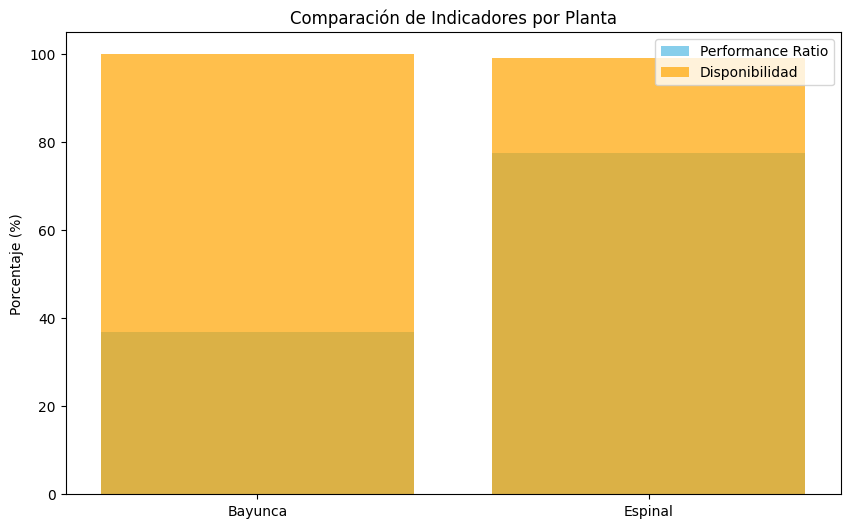

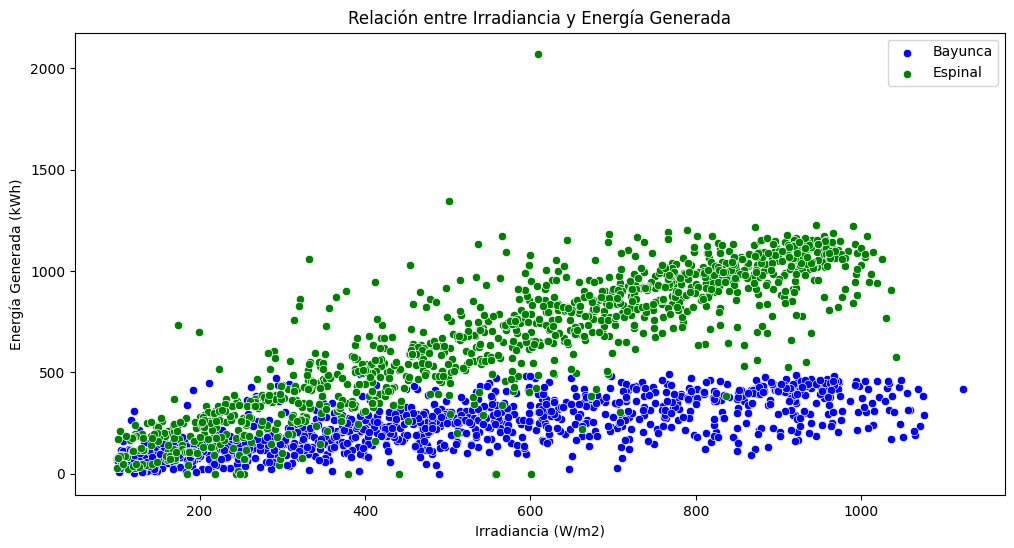

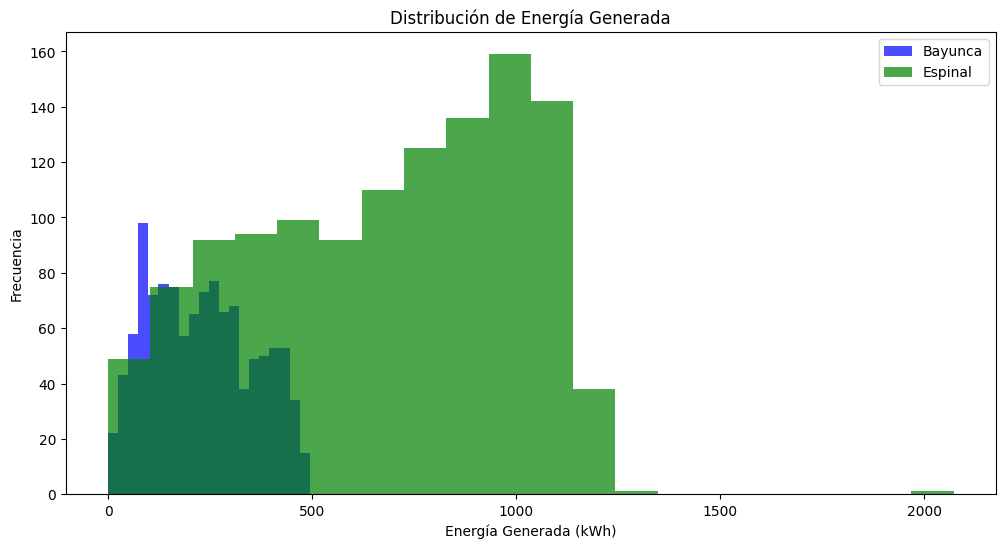

In [ ]:
# 5. Visualizaciones
# Comparación de indicadores
indicadores = pd.DataFrame({
    'Planta': ['Bayunca', 'Espinal'],
    'Performance Ratio (%)': [pr_bayunca, pr_espinal],
    'Disponibilidad (%)': [ava_bayunca, ava_espinal]
})

plt.figure(figsize=(10, 6))
plt.bar(indicadores['Planta'], indicadores['Performance Ratio (%)'], color='skyblue', label='Performance Ratio')
plt.bar(indicadores['Planta'], indicadores['Disponibilidad (%)'], color='orange', alpha=0.7, label='Disponibilidad')
plt.title('Comparación de Indicadores por Planta')
plt.ylabel('Porcentaje (%)')
plt.legend()
plt.show()

# Visualización de datos de irradiancia y energía
plt.figure(figsize=(12, 6))
sns.scatterplot(data=bayunca, x='M1_POA_IRR (W/m2)', y='Energía Generada(kWh)', label='Bayunca', color='blue')
sns.scatterplot(data=espinal, x='M1_POA_IRR (W/m2)', y='Energía Generada(kWh)', label='Espinal', color='green')
plt.title('Relación entre Irradiancia y Energía Generada')
plt.xlabel('Irradiancia (W/m2)')
plt.ylabel('Energía Generada (kWh)')
plt.legend()
plt.show()

# Visualización univariada (histogramas)
plt.figure(figsize=(12, 6))
plt.hist(bayunca['Energía Generada(kWh)'], bins=20, alpha=0.7, label='Bayunca', color='blue')
plt.hist(espinal['Energía Generada(kWh)'], bins=20, alpha=0.7, label='Espinal', color='green')
plt.title('Distribución de Energía Generada')
plt.xlabel('Energía Generada (kWh)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

---


**GRÁFICOS**

Se generaron múltiples gráficos para analizar y comprender mejor las relaciones entre las variables del dataset y evaluar el desempeño de las plantas solares. A continuación, se describe cada uno en detalle junto con sus hallazgos:

**1. Distribución de energía generada (univariado)**

Se utilizaron histogramas para analizar la distribución de la energía generada en ambas plantas. Este tipo de visualización permite identificar patrones y diferencias:

**Bayunca:** La mayoría de los intervalos de generación están en rangos bajos, lo que sugiere un desempeño limitado. Esto podría deberse a factores como menor irradiancia, problemas de diseño o mantenimiento de los módulos.

**El Espinal:** Presenta una distribución más uniforme y una mayor concentración en rangos altos de generación, lo que indica una mayor capacidad para aprovechar la irradiancia disponible.

**Comparación:** Se observa que la planta el Espinal genera de manera consistente más energía que Bayunca, incluso en condiciones similares, lo que apunta a diferencias en eficiencia.

**2. Relación entre irradiancia y energía generada (bivariado)**

Un gráfico de dispersión permitió evaluar cómo la irradiancia afecta la generación de energía en ambas plantas:

Existe una correlación positiva clara entre la irradiancia y la energía generada. A medida que aumenta la irradiancia, también lo hace la generación de energía.

**Bayunca:** Aunque sigue el mismo patrón, la energía generada no crece tan rápidamente con el aumento de la irradiancia en comparación con el Espinal. Esto indica una menor eficiencia en la conversión de energía solar.

**Espinal:** Muestra una mayor pendiente en la relación, lo que sugiere un mejor aprovechamiento de la irradiancia disponible.

**3. Relación entre irradiancia, energía generada y temperatura del módulo (multivariado)**

Para analizar cómo la temperatura afecta el rendimiento, se utilizó una visualización multivariada que combina irradiancia, energía generada y temperatura del módulo fotovoltaico:

**Relación positiva entre irradiancia y generación:** La energía generada aumenta a medida que la irradiancia incrementa, como se esperaba.

**Impacto de la temperatura:** Se observó que, aunque la energía generada aumenta con la irradiancia, las temperaturas más altas tienden a limitar el rendimiento. Esto es consistente con el efecto negativo de las altas temperaturas en la eficiencia de los módulos solares.

**Diferencias entre plantas:** Bayunca parece ser más sensible a las variaciones de temperatura, mientras que el Espinal mantiene un rendimiento más estable incluso en condiciones de mayor calor.


---



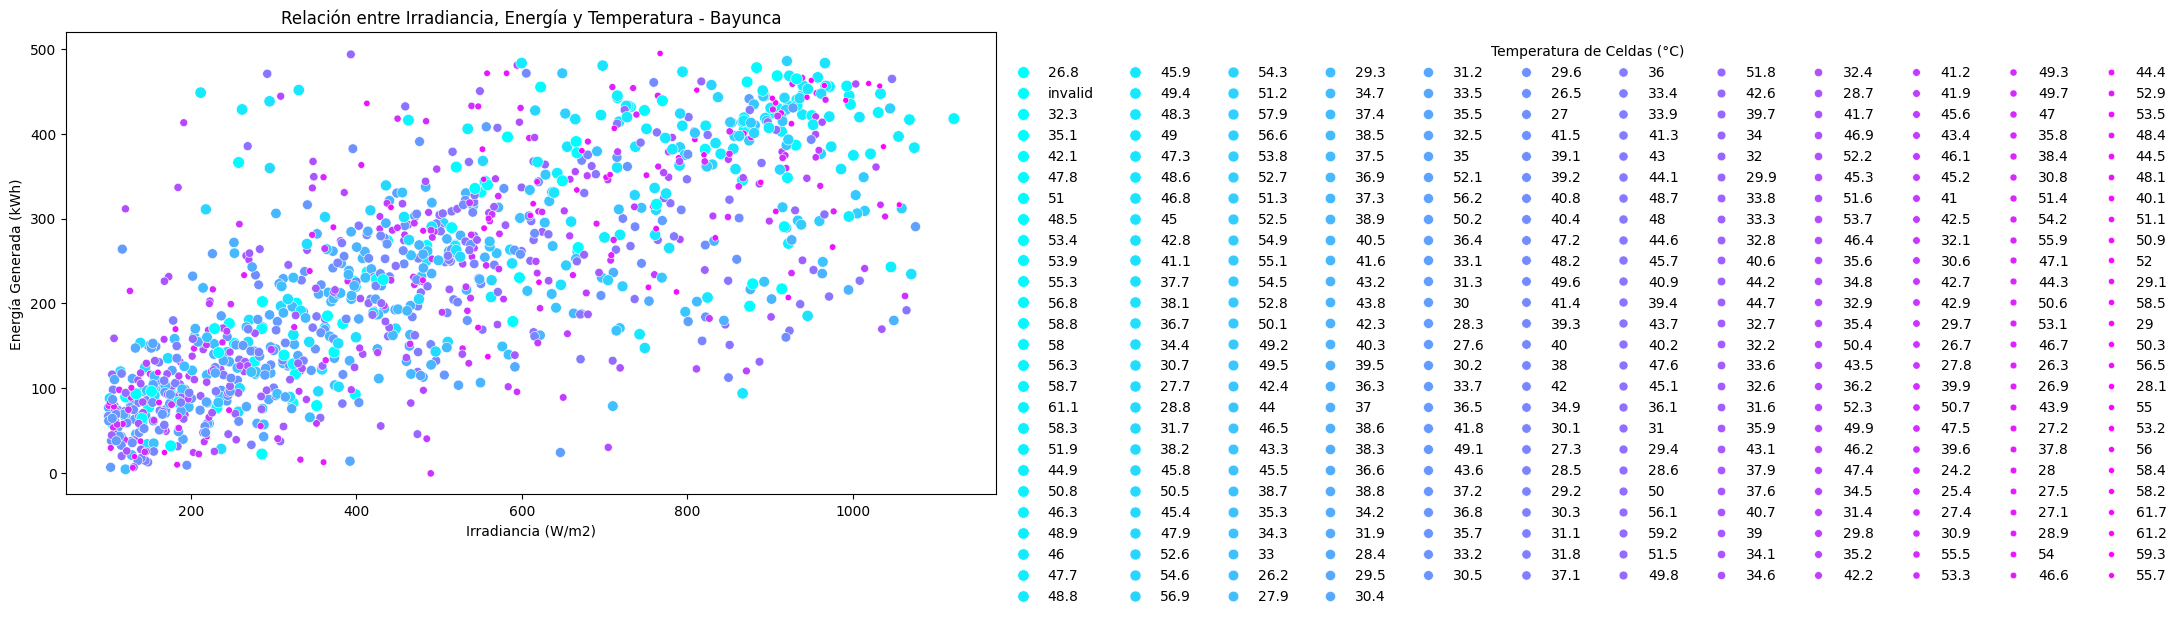

In [ ]:
# Visualización multivariada (tres variables) con leyenda optimizada
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=bayunca,
    x='M1_POA_IRR (W/m2)',
    y='Energía Generada(kWh)',
    size='M1_Temp_Cell (°C)',
    hue='M1_Temp_Cell (°C)',
    palette='cool',
    legend='brief'
)
plt.title('Relación entre Irradiancia, Energía y Temperatura - Bayunca')
plt.xlabel('Irradiancia (W/m2)')
plt.ylabel('Energía Generada (kWh)')

# Optimización de la leyenda (horizontal)
plt.legend(
    title='Temperatura de Celdas (°C)',
    bbox_to_anchor=(1, 1),  # Posicionar la leyenda fuera del gráfico
    loc='upper left',       # Leyenda en la parte superior izquierda
    ncol=12,                 # Convertir la leyenda a una disposición horizontal
    frameon=False           # Eliminar el recuadro de la leyenda
)
plt.show()





---


**Identificación de valores perdidos y manejo**

Durante el análisis del dataset, se identificaron valores inválidos etiquetados como "invalid" en las columnas de temperatura, específicamente en M1_Temp_Cell (°C) y M1_Temp_Air (°C). Estos valores son considerados datos faltantes o no válidos, lo que puede afectar los cálculos y visualizaciones.

**Para abordar este problema se tomaron los siguientes pasos:**

**Conversión de datos a tipo numérico:**

Las columnas que contenían valores inválidos fueron convertidas a tipo numérico utilizando el método pd.to_numeric() con el argumento errors='coerce'. Esto transforma los valores no numéricos (como "invalid") en valores nulos (NaN), facilitando su manejo posterior.

**Codigo utilizado**

**bayunca['M1_Temp_Cell (°C)'] = pd.to_numeric(bayunca['M1_Temp_Cell (°C)'], errors='coerce')
bayunca['M1_Temp_Air (°C)'] = pd.to_numeric(bayunca['M1_Temp_Air (°C)'], errors='coerce').**

---
**Eliminación de filas con valores nulos:**

Una vez identificados los valores nulos (NaN) en las columnas de temperatura, se eliminaron las filas correspondientes utilizando el método dropna(). Esto asegura que los datos utilizados en los análisis sean consistentes y válidos.

**Codigo utilizado**

**bayunca = bayunca.dropna(subset=['M1_Temp_Cell (°C)', 'M1_Temp_Air (°C)'])**

---

**Impacto del manejo de valores perdidos:**

Este procedimiento permitió limpiar el dataset y garantizar que las visualizaciones y cálculos (como el performance ratio y la generación de energía) no se vean afectados por datos inválidos.
Aunque algunas filas fueron eliminadas, el volumen de datos restantes es suficiente para realizar un análisis robusto y confiable.

**Recomendaciones:**


*   Implementar mecanismos de validación durante la recolección de datos para
evitar registros con valores como "invalid".

*   Desarrollar estrategias para imputar valores faltantes en lugar de eliminarlos, como el uso de promedios o interpolación, dependiendo de la criticidad de la información.


---



In [ ]:
# Subconjunto de datos para pruebas
subset_bayunca = bayunca[bayunca['Energía Generada(kWh)'] > 100]
subset_espinal = espinal[espinal['Energía Generada(kWh)'] > 100]

print("Subconjunto Bayunca - Primeras filas:")
print(subset_bayunca.head())

print("\nSubconjunto Espinal - Primeras filas:")
print(subset_espinal.head())

# Guardar resultados
indicadores.to_csv("indicadores_plantas.csv", index=False)
print("Resultados guardados en 'indicadores_plantas.csv'.")


Subconjunto Bayunca - Primeras filas:
                  Date     Nombre  Provincia      País  Energía Generada(kWh)  \
27 2024-06-01 06:45:01  Bayunca 1  Cartagena  Colombia                  101.4   
28 2024-06-01 07:00:01  Bayunca 1  Cartagena  Colombia                  153.0   
29 2024-06-01 07:15:01  Bayunca 1  Cartagena  Colombia                  200.4   
30 2024-06-01 07:30:02  Bayunca 1  Cartagena  Colombia                  226.2   
31 2024-06-01 07:45:00  Bayunca 1  Cartagena  Colombia                  268.2   

    INV_A_E  INV_B_E  INV_C_E  INV_D_E M1_Temp_Cell (°C) M1_Temp_Air (°C)  \
27      0.0     25.6     24.7     22.4           invalid          invalid   
28      0.0     41.2     41.7     38.1              32.3             26.7   
29      0.0     56.9     60.6     56.2              35.1             26.8   
30      0.0     69.6     73.0     71.0              42.1             27.2   
31      0.0     79.1     85.4     80.8              47.8             27.5   

    M1_POA_I



---


**Vinculación de gráficos y análisis numéricos**

**Interpretación de resultados:**

**Performance Ratio y Disponibilidad:**
El PR más alto en El Espinal (77.40%) confirma que es más eficiente en convertir la irradiancia en energía utilizable. Sin embargo, ambas plantas tienen disponibilidades similares (Bayunca: 99.91%, El Espinal: 99.18%), lo que indica una alta confiabilidad operativa.

**Relación entre variables:**
La irradiancia es un factor crítico para la generación de energía. Aunque Bayunca y El Espinal tienen una relación similar entre irradiancia y generación, las mayores irradiancias en El Espinal permiten una mayor producción total.


---

